In [199]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors


In [6]:
insurance=pd.read_csv("insurance.csv")
df=insurance.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.shape

(1338, 7)

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<ipython-input-12-7212aa57cc85>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df['bmi'], kde=True, color='c')


Text(0.5, 1.0, 'Body Mass INDEX')

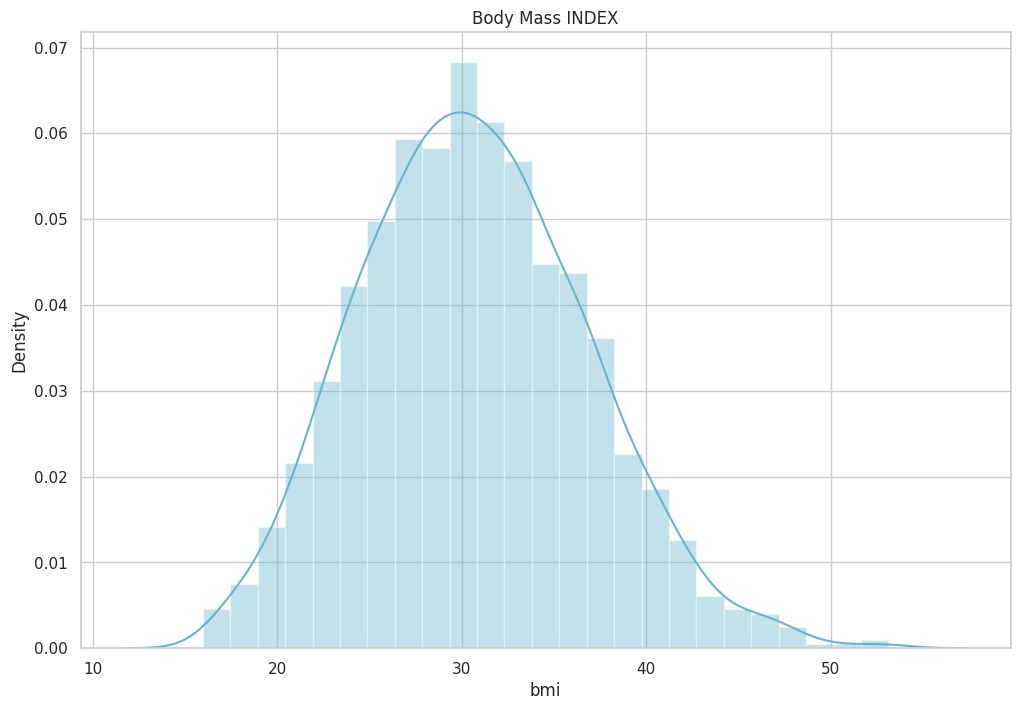

In [12]:
sns.set(style='whitegrid')
f, ax=plt.subplots(1,1, figsize=(12, 8))
ax=sns.distplot(df['bmi'], kde=True, color='c')
plt.title('Body Mass INDEX')

In [13]:
selected_data=df[["smoker", "charges"]]

In [14]:
selected_data["smoker"] = selected_data["smoker"].map({"no": 0, "yes": 1})

<ipython-input-14-2decb041757f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["smoker"] = selected_data["smoker"].map({"no": 0, "yes": 1})


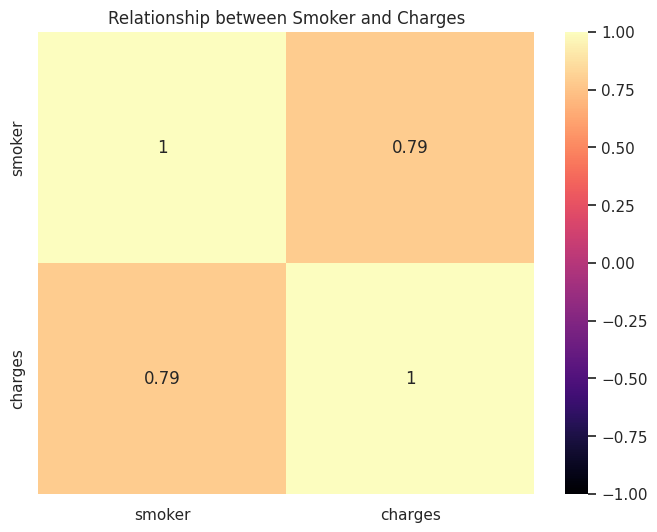

In [15]:
plt.figure(figsize=(8, 6))
heatmap_data = selected_data.corr()
sns.heatmap(heatmap_data, annot=True, cmap="magma", vmin=-1, vmax=1)
plt.title("Relationship between Smoker and Charges")
plt.show()

In [16]:
cross_tab = pd.crosstab(df['smoker'], df['region'])
print(cross_tab)

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


<Figure size 1000x600 with 0 Axes>

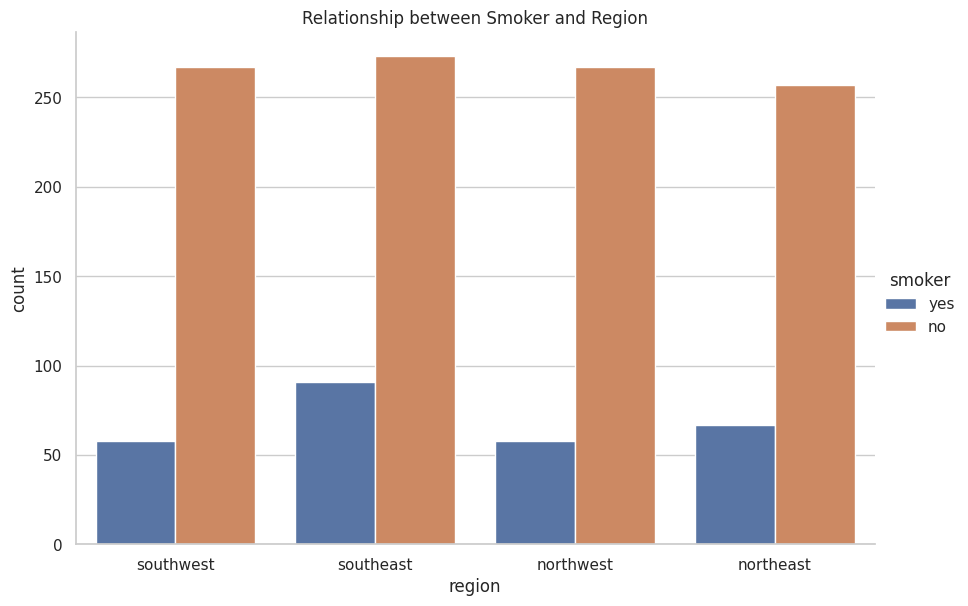

In [17]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="region", hue="smoker", kind="count", height=6, aspect=1.5)
plt.title("Relationship between Smoker and Region")
plt.show()

Text(0.5, 1.0, 'Bmi & Sex')

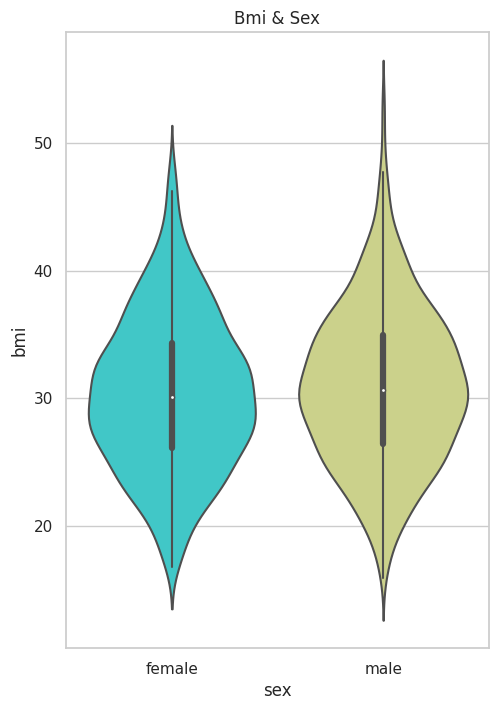

In [18]:
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='bmi',data=df,palette='rainbow',ax=ax)
ax.set_title('Bmi & Sex')

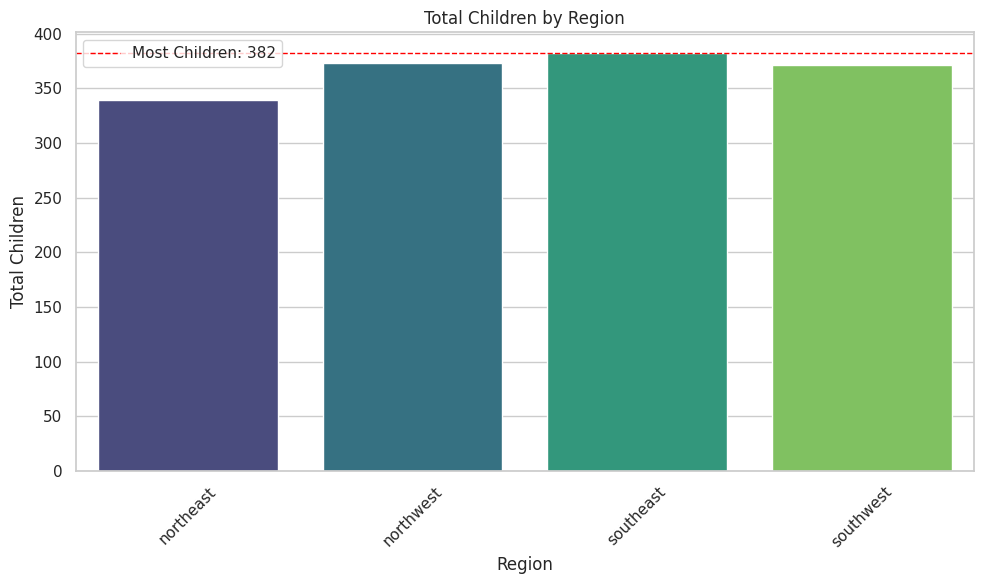

In [19]:
region_children_sum = df.groupby("region")["children"].sum()

region_with_most_children = region_children_sum.idxmax()
most_children_count = region_children_sum.max()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_children_sum.index, y=region_children_sum.values, palette="viridis")
plt.title("Total Children by Region")
plt.xlabel("Region")
plt.ylabel("Total Children")
plt.axhline(most_children_count, color='red', linestyle='dashed', label=f'Most Children: {most_children_count}', linewidth=1)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

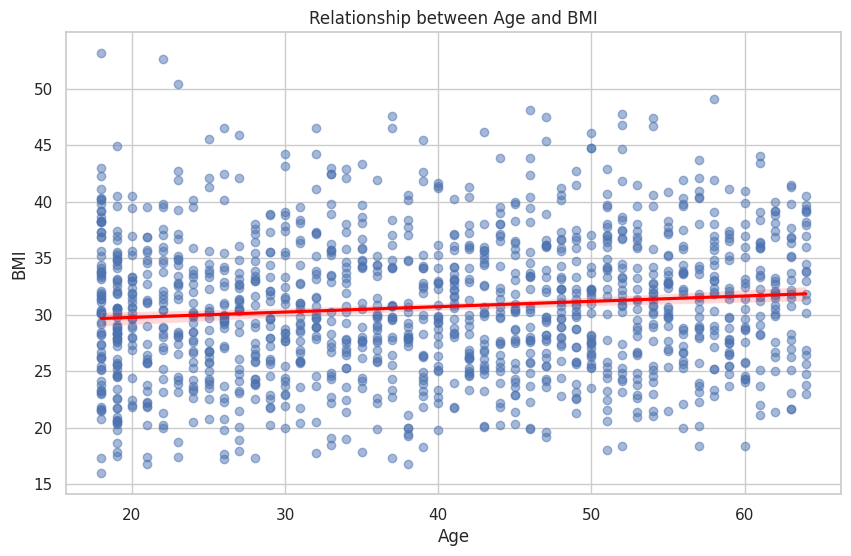

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='bmi', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relationship between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

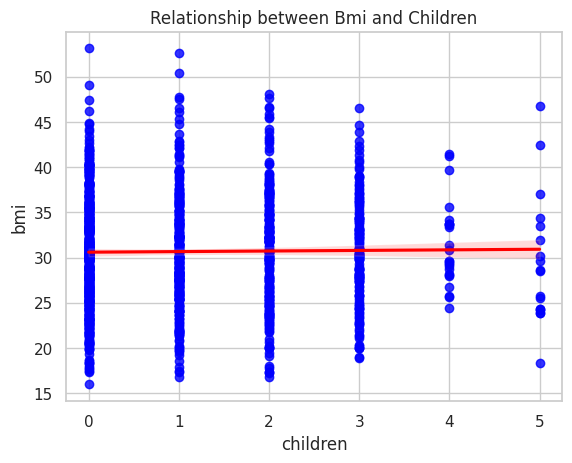

In [21]:
sns.regplot(data=df, y="bmi", x='children', dropna=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("children")
plt.ylabel("bmi")
plt.title("Relationship between Bmi and Children")
plt.show()


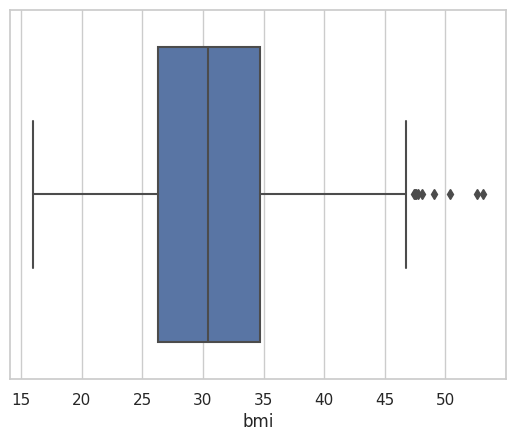

In [22]:
sns.boxplot(x=df["bmi"]);

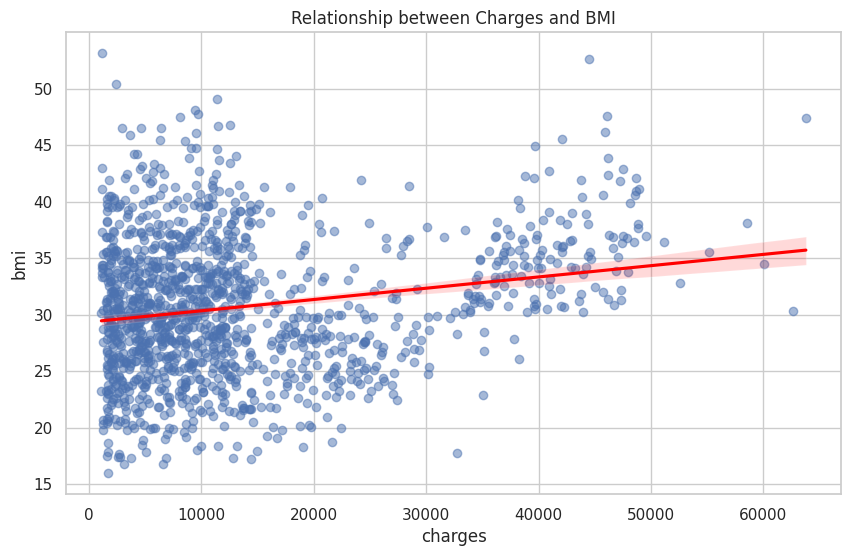

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x='charges', y='bmi', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relationship between Charges and BMI")
plt.xlabel("charges")
plt.ylabel("bmi")
plt.show()

In [24]:
df[["charges","bmi"]].corr()

,charges,bmi
charges,1.000000,0.198341
bmi,0.198341,1.000000


<ipython-input-25-12de1c384028>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="region", y="bmi", hue="smoker", ci=None)


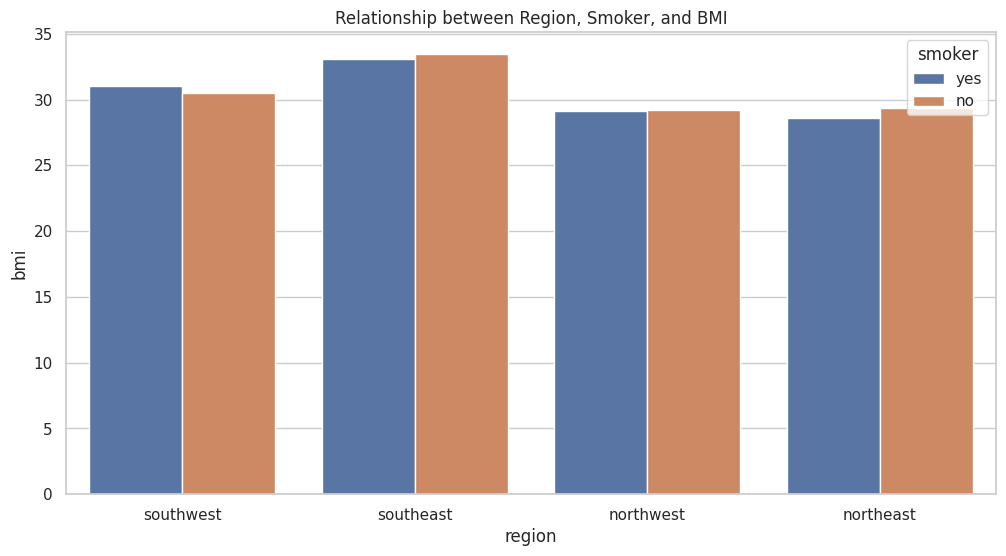

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="region", y="bmi", hue="smoker", ci=None)
plt.title("Relationship between Region, Smoker, and BMI")
plt.xlabel("region")
plt.ylabel("bmi")
plt.legend(title="smoker")
plt.show()

In [26]:
df['sex'] = pd.factorize(df['sex'])[0] + 1
df['region'] = pd.factorize(df['region'])[0] + 1
df['smoker'] = pd.factorize(df['smoker'])[0] + 1
corr = df.corr()
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
smoker     -0.787251
Name: charges, dtype: float64

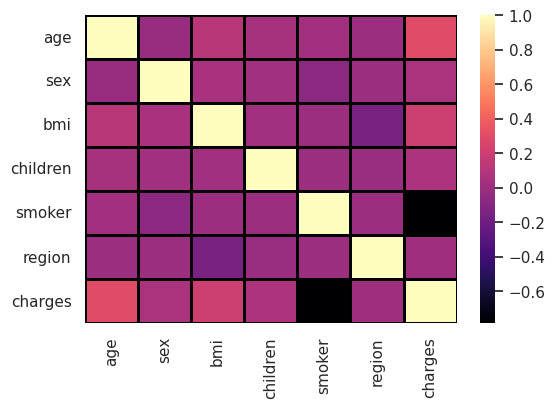

In [27]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='magma', linecolor='black', linewidths= 2 )
plt.show()

<Figure size 600x400 with 0 Axes>

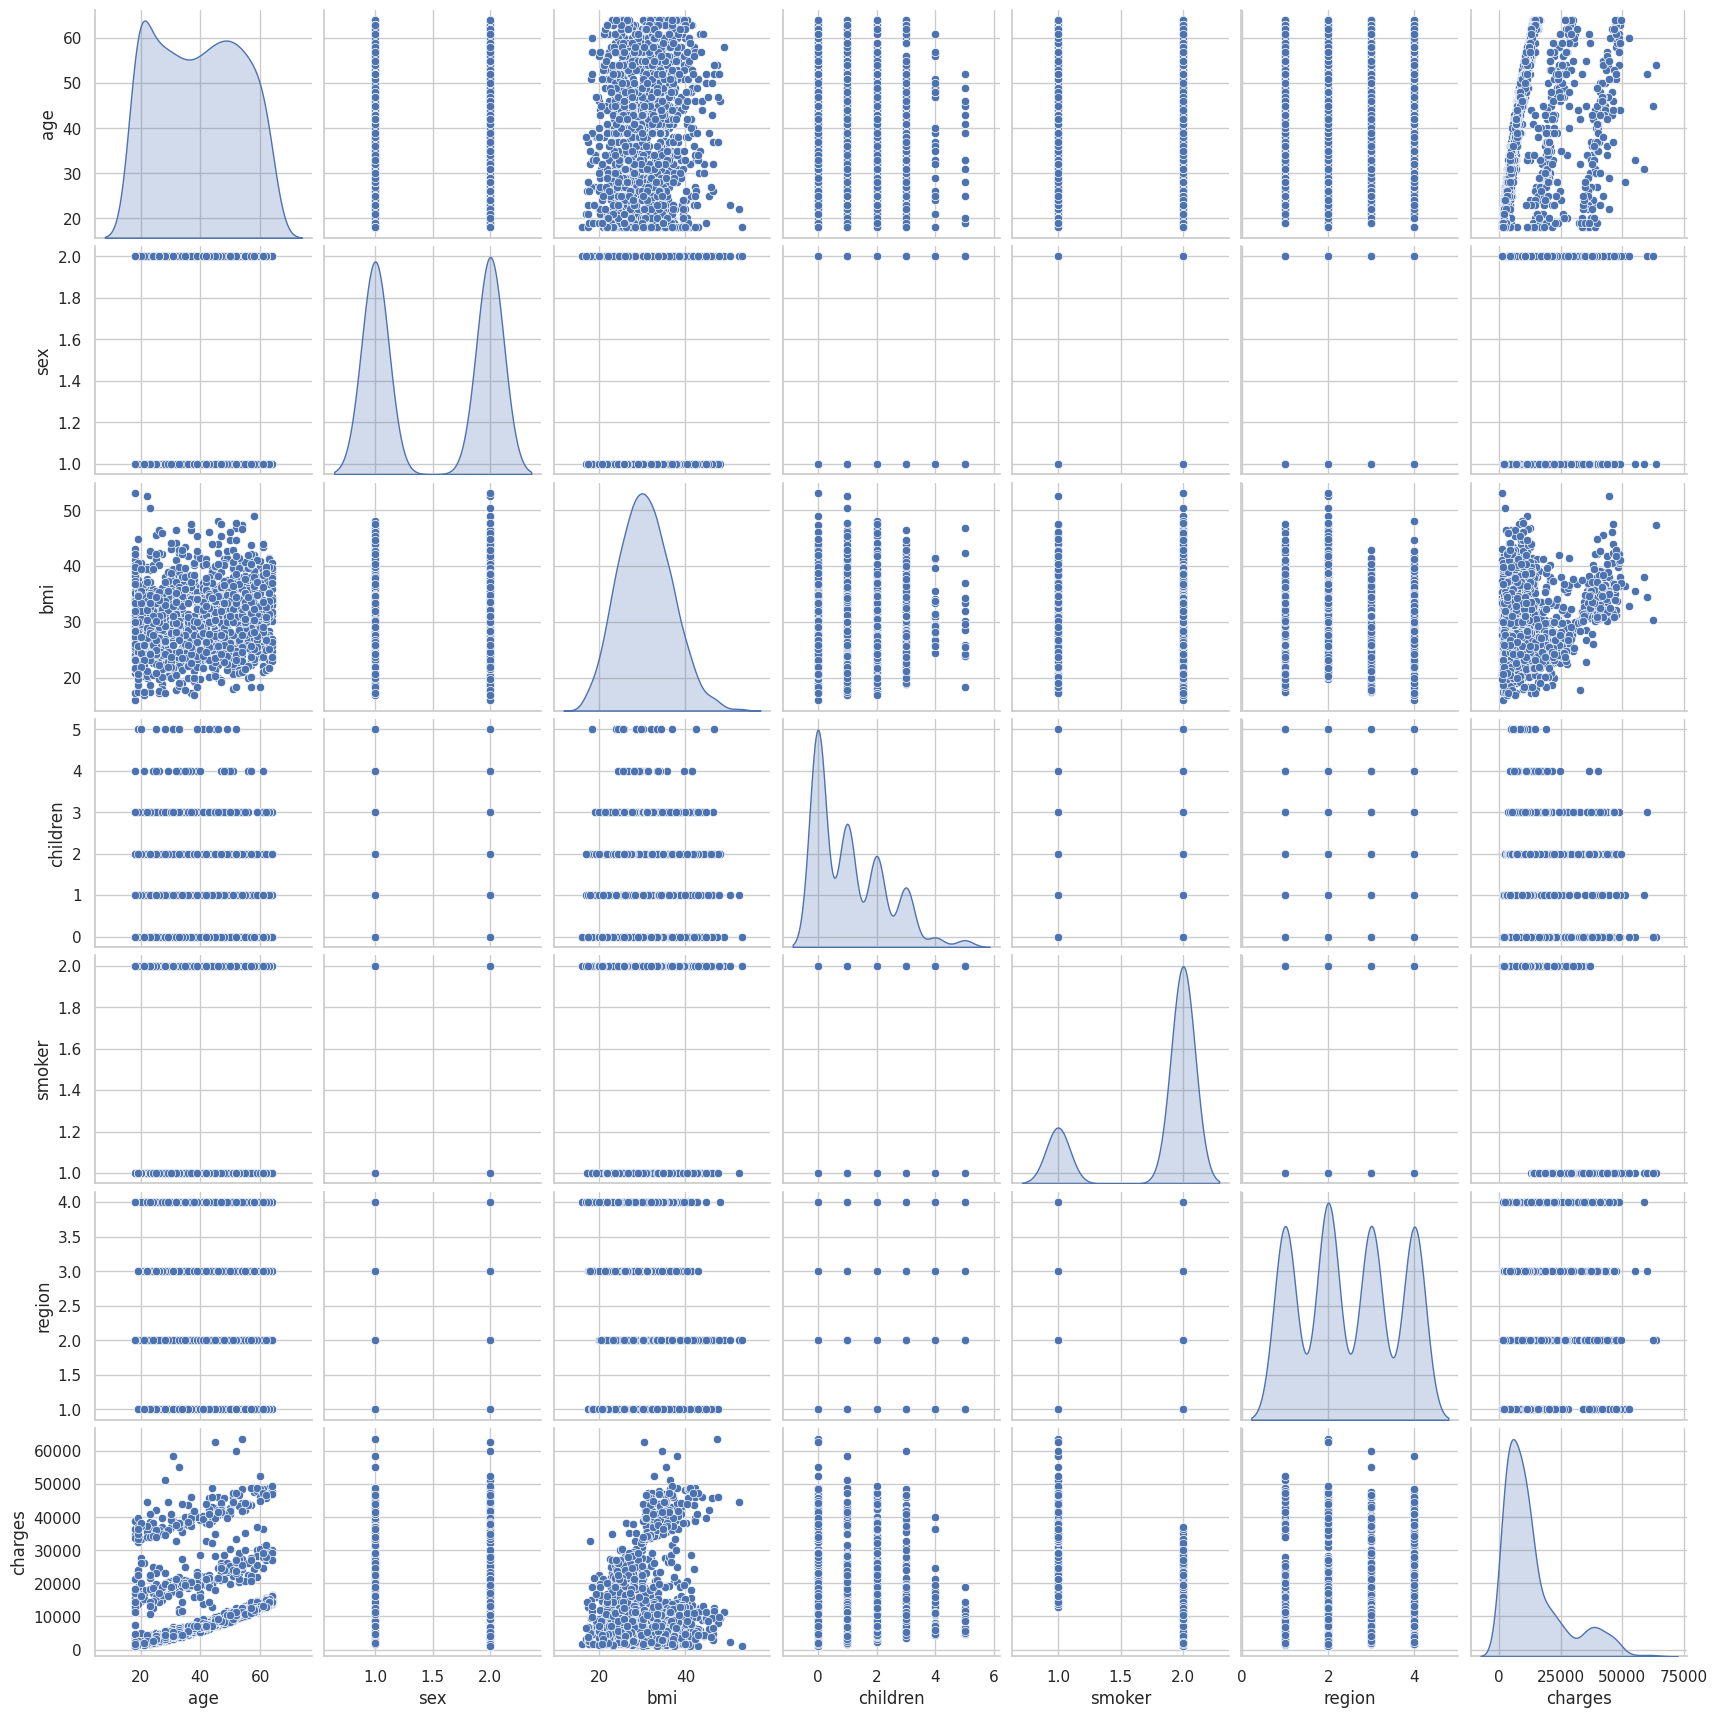

In [28]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');

In [43]:
df.shape

(1338, 11)

In [44]:
df

,age,sex,bmi,children,smoker,region,charges,region_1,region_2,region_3,region_4
0,19,1,27.900,0,1,1,16884.92400,1,0,0,0
1,18,2,33.770,1,2,2,1725.55230,0,1,0,0
2,28,2,33.000,3,2,2,4449.46200,0,1,0,0
3,33,2,22.705,0,2,3,21984.47061,0,0,1,0
4,32,2,28.880,0,2,3,3866.85520,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,2,30.970,3,2,3,10600.54830,0,0,1,0
1334,18,1,31.920,0,2,4,2205.98080,0,0,0,1
1335,18,1,36.850,0,2,2,1629.83350,0,1,0,0
1336,21,1,25.800,0,2,1,2007.94500,1,0,0,0


In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges,region_1,region_2,region_3,region_4
0,19,1,27.900,0,1,1,16884.92400,1,0,0,0
1,18,2,33.770,1,2,2,1725.55230,0,1,0,0
2,28,2,33.000,3,2,2,4449.46200,0,1,0,0
3,33,2,22.705,0,2,3,21984.47061,0,0,1,0
4,32,2,28.880,0,2,3,3866.85520,0,0,1,0


In [46]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,region_1,region_2,region_3,region_4
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.505232,30.663397,1.094918,1.795217,2.484305,13270.422265,0.242900,0.272048,0.242900,0.242152
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.428995,0.445181,0.428995,0.428546
min,18.000000,1.000000,15.960000,0.000000,1.000000,1.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,26.296250,0.000000,2.000000,2.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,2.000000,30.400000,1.000000,2.000000,2.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,2.000000,34.693750,2.000000,2.000000,3.000000,16639.912515,0.000000,1.000000,0.000000,0.000000
max,64.000000,2.000000,53.130000,5.000000,2.000000,4.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [36]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
 7   region_1  1338 non-null   uint8  
 8   region_2  1338 non-null   uint8  
 9   region_3  1338 non-null   uint8  
 10  region_4  1338 non-null   uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 78.5 KB


In [49]:
X = df.drop(columns='charges')
y = df['charges']

In [52]:
X

,age,sex,bmi,children,smoker,region,region_1,region_2,region_3,region_4
0,19,1,27.900,0,1,1,1,0,0,0
1,18,2,33.770,1,2,2,0,1,0,0
2,28,2,33.000,3,2,2,0,1,0,0
3,33,2,22.705,0,2,3,0,0,1,0
4,32,2,28.880,0,2,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,2,30.970,3,2,3,0,0,1,0
1334,18,1,31.920,0,2,4,0,0,0,1
1335,18,1,36.850,0,2,2,0,1,0,0
1336,21,1,25.800,0,2,1,1,0,0,0


In [53]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [56]:
X_train.shape, X_test.shape

((1070, 10), (268, 10))

In [57]:
y_train.shape, y_test.shape

((1070,), (268,))

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
X_train

array([[-0.14853305,  1.01506676,  0.54530479, ..., -0.6155209 ,
        -0.55791981, -0.55071651],
       [-1.49780784,  1.01506676,  0.59867181, ...,  1.6246402 ,
        -0.55791981, -0.55071651],
       [-1.14273553, -0.98515688,  0.96092064, ..., -0.6155209 ,
        -0.55791981,  1.81581628],
       ...,
       [ 0.06451033,  1.01506676, -0.91339361, ...,  1.6246402 ,
        -0.55791981, -0.55071651],
       [-1.42679338,  1.01506676,  0.77656186, ..., -0.6155209 ,
         1.79237229, -0.55071651],
       [-0.4325909 , -0.98515688, -1.97749955, ..., -0.6155209 ,
        -0.55791981, -0.55071651]])

In [61]:
X_test

array([[ 0.91668389,  1.01506676, -0.08539629, ..., -0.6155209 ,
        -0.55791981, -0.55071651],
       [ 0.56161157, -0.98515688, -0.21962242, ...,  1.6246402 ,
        -0.55791981, -0.55071651],
       [ 0.63262604,  1.01506676,  1.59081313, ..., -0.6155209 ,
         1.79237229, -0.55071651],
       ...,
       [ 1.2717562 ,  1.01506676,  1.54472343, ..., -0.6155209 ,
        -0.55791981,  1.81581628],
       [-0.64563429, -0.98515688,  1.34581001, ...,  1.6246402 ,
        -0.55791981, -0.55071651],
       [ 0.49059711,  1.01506676, -0.95948331, ..., -0.6155209 ,
        -0.55791981,  1.81581628]])

In [62]:
from sklearn.linear_model import LinearRegression

regressor_lr = LinearRegression()

In [63]:
regressor_lr.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = regressor_lr.predict(X_test)

In [65]:
from sklearn.metrics import r2_score

In [66]:
r2_score(y_test, y_pred)

0.8002995641153944

In [67]:
from sklearn.ensemble import RandomForestRegressor

regressor_rm = RandomForestRegressor()

In [68]:
regressor_rm.fit(X_train, y_train)


RandomForestRegressor()

In [69]:
y_pred = regressor_rm.predict(X_test)

In [70]:
r2_score(y_test, y_pred)

0.8826638892944669

In [71]:
from xgboost import XGBRFRegressor

regressor_xgb = XGBRFRegressor()

In [72]:
regressor_xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [73]:
y_pred = regressor_xgb.predict(X_test)

In [74]:
r2_score(y_test, y_pred)

0.8881920192639916

In [76]:
df.head()

,age,sex,bmi,children,smoker,region,charges,region_1,region_2,region_3,region_4
0,19,1,27.900,0,1,1,16884.92400,1,0,0,0
1,18,2,33.770,1,2,2,1725.55230,0,1,0,0
2,28,2,33.000,3,2,2,4449.46200,0,1,0,0
3,33,2,22.705,0,2,3,21984.47061,0,0,1,0
4,32,2,28.880,0,2,3,3866.85520,0,0,1,0


In [88]:
single_obs=[[19, 27.900, 0, 1, 1, 1, 0, 0, 0]]

In [90]:
predicted_charge = regressor_xgb.predict(single_obs)
print("Predicted Charges:", predicted_charge)

Predicted Charges: [16267.205]


In [91]:
single_obs_2=[[18, 33.770, 1, 2, 2, 0, 1, 0, 0]]

In [92]:
predicted_charge = regressor_xgb.predict(single_obs_2)
print("Predicted Charges:", predicted_charge)

Predicted Charges: [19408.428]


In [95]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.3 MB/s eta 0:00:00


In [96]:
!pip install xgboost

In [97]:
!pip install lightgbm

In [98]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [109]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
mlpc=MLPRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 10
[LightGBM] [Info] Start training from score 13346.089733
Learning rate set to 0.041383
0:	learn: 11649.6060274	total: 899us	remaining: 898ms
1:	learn: 11297.0444809	total: 1.73ms	remaining: 862ms
2:	learn: 10976.1155599	total: 2.98ms	remaining: 992ms
3:	learn: 10663.6254747	total: 4.19ms	remaining: 1.04s
4:	learn: 10367.3485722	total: 5.29ms	remaining: 1.05s
5:	learn: 10066.3519075	total: 6.39ms	remaining: 1.06s
6:	learn: 9784.0366431	total: 6.9ms	remaining: 979ms
7:	learn: 9533.7456628	total: 9.93ms	remaining: 1.23s
8:	learn: 9268.0776084	total: 12.7ms	remaining: 1.4s
9:	learn: 9004.4430656	total: 13.9ms	remaining: 1.38s
10:	learn: 8777.

In [110]:
models=[ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

In [111]:
def ML(y,models):
    y_pred=models.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mape=mean_absolute_percentage_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    return rmse,mape,mae

In [114]:
for i in models:
     print(i,"Algorithm succed rate :",ML("charges",i))

Ridge() Algorithm succed rate : (5800.1788847394255, 0.4712946590559311, 4193.277714095141)
Lasso() Algorithm succed rate : (5796.776514272715, 0.46921746164368117, 4182.247719720998)
ElasticNet() Algorithm succed rate : (9492.314727603152, 1.0326987143741106, 7415.9919533748425)
KNeighborsRegressor() Algorithm succed rate : (11741.739440734715, 0.9960137387391007, 8113.810552563431)
AdaBoostRegressor() Algorithm succed rate : (5844.222102043356, 1.0025726740622896, 5221.309819068282)
SVR() Algorithm succed rate : (12903.387775621637, 1.1213741764746814, 8597.662519155749)
MLPRegressor() Algorithm succed rate : (12013.892646783965, 1.0126178140006756, 8122.2546174416475)
DecisionTreeRegressor() Algorithm succed rate : (6953.620168041888, 0.46269043574247454, 3423.1836964402987)
RandomForestRegressor() Algorithm succed rate : (4613.191316600028, 0.3039120105463655, 2552.9873649314995)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsam

In [115]:
X_train2,X_test2,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [116]:
sc=StandardScaler()
X_train2=sc.fit_transform(X_train2)
X_test2=sc.transform(X_test2)

In [117]:
X_train2


array([[-0.14853305,  1.01506676,  0.54530479, ..., -0.6155209 ,
        -0.55791981, -0.55071651],
       [-1.49780784,  1.01506676,  0.59867181, ...,  1.6246402 ,
        -0.55791981, -0.55071651],
       [-1.14273553, -0.98515688,  0.96092064, ..., -0.6155209 ,
        -0.55791981,  1.81581628],
       ...,
       [ 0.06451033,  1.01506676, -0.91339361, ...,  1.6246402 ,
        -0.55791981, -0.55071651],
       [-1.42679338,  1.01506676,  0.77656186, ..., -0.6155209 ,
         1.79237229, -0.55071651],
       [-0.4325909 , -0.98515688, -1.97749955, ..., -0.6155209 ,
        -0.55791981, -0.55071651]])

In [118]:
ridge2=Ridge().fit(X_train2,y_train)
lasso2=Lasso().fit(X_train2,y_train)
enet2=ElasticNet().fit(X_train2,y_train)
knn2=KNeighborsRegressor().fit(X_train2,y_train)
ada2=AdaBoostRegressor().fit(X_train2,y_train)
svm2=SVR().fit(X_train2,y_train)
mlpc2=MLPRegressor().fit(X_train2,y_train)
dtc2=DecisionTreeRegressor().fit(X_train2,y_train)
rf2=RandomForestRegressor().fit(X_train2,y_train)
xgb2=XGBRegressor().fit(X_train2,y_train)
gbm2=GradientBoostingRegressor().fit(X_train2,y_train)
lgb2=LGBMRegressor().fit(X_train2,y_train)
catbost2=CatBoostRegressor().fit(X_train2,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 333
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 10
[LightGBM] [Info] Start training from score 13201.182046
Learning rate set to 0.041383
0:	learn: 11613.3854123	total: 1.25ms	remaining: 1.25s
1:	learn: 11261.8758961	total: 3.89ms	remaining: 1.94s
2:	learn: 10944.1318477	total: 6.09ms	remaining: 2.02s
3:	learn: 10635.7794225	total: 14ms	remaining: 3.49s
4:	learn: 10343.3558709	total: 15.9ms	remaining: 3.17s
5:	learn: 10046.0028118	total: 18.1ms	remaining: 3s
6:	learn: 9780.2521518	total: 19.7ms	remaining: 2.79s
7:	learn: 9530.8881198	total: 21.1ms	remaining: 2.62s
8:	learn: 9268.0807736	total: 23.3ms	remaining: 2.57s
9:	learn: 9021.5112238	total: 26.2ms	remaining: 2.6s
10:	learn: 8798.667

In [120]:
models=[ridge2,lasso2,enet2,knn2,ada2,svm2,mlpc2,dtc2,rf2,xgb2,gbm2,lgb2,catbost2]

In [121]:
def ML(y,models):
    y_pred=models.predict(X_test2)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mape=mean_absolute_percentage_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    return rmse,mape,mae

In [122]:
for i in models:
     print(i,"Algorithm succed rate :",ML("charges",i))

Ridge() Algorithm succed rate : (5642.584770594802, 0.3953253040094125, 3935.0178194333776)
Lasso() Algorithm succed rate : (5641.872845619891, 0.3950541238622906, 3933.4846600969036)
ElasticNet() Algorithm succed rate : (7014.810136630096, 0.6963956925456177, 5147.339720062684)
KNeighborsRegressor() Algorithm succed rate : (5012.055293550295, 0.3672275816786819, 3279.216767130597)
AdaBoostRegressor() Algorithm succed rate : (4816.4135570654125, 0.7078309093040314, 3952.8264342794264)
SVR() Algorithm succed rate : (13248.914429528068, 0.9836459199627816, 8592.750322870861)
MLPRegressor() Algorithm succed rate : (17938.83098786518, 0.9374260703695946, 12994.395130263301)
DecisionTreeRegressor() Algorithm succed rate : (7228.488038619731, 0.4963789034714747, 3561.1653261902984)
RandomForestRegressor() Algorithm succed rate : (4264.954100524729, 0.33273651490057, 2574.1663768816848)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_

In [124]:
gbm

GradientBoostingRegressor()

In [172]:
gbm_params={
        "max_depth":[1,2,3],
        "learning_rate":[0.1,0.01,0.5,0.05],
        "n_estimators":[40,180,250],
        "min_samples_split":[1,2,3]
}

In [173]:
grid_cv=GridSearchCV(gbm,gbm_params,cv=5,n_jobs=-1,verbose=5).fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

In [174]:
grid_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

In [175]:
gbm_tun=GradientBoostingRegressor(**grid_cv.best_params_).fit(X_train,y_train)

In [176]:
y_pred=gbm_tun.predict(X_test)

In [177]:
np.sqrt(mean_squared_error(y_test,y_pred))

12638.606308648546

In [178]:
mean_absolute_percentage_error(y_test,y_pred)

1.4640472257343613

In [179]:
param_dist = {
    'n_estimators': np.arange(40, 251, 9),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 9),
    'min_samples_split': np.arange(2, 19),
    'min_samples_leaf': np.arange(1, 19),
    'max_features': [None, 'sqrt', 'log2']
}

In [180]:
random_search = RandomizedSearchCV(gbm, param_distributions=param_dist, n_iter=100,cv=5, verbose=2, random_state=42, n_jobs=-1).fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [181]:
best_params = random_search.best_params_

print("Best Parametters:", best_params)

Best Parametters: {'n_estimators': 58, 'min_samples_split': 14, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.01}


In [182]:
random_search.best_params_

{'n_estimators': 58,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'max_features': 'log2',
 'max_depth': 4,
 'learning_rate': 0.01}

In [183]:
gbm_tun2=GradientBoostingRegressor(**random_search.best_params_).fit(X_train,y_train)

In [184]:
y_pred=gbm_tun2.predict(X_test)

In [185]:
np.sqrt(mean_squared_error(y_test,y_pred))

12614.794261895879

In [186]:
mean_absolute_percentage_error(y_test,y_pred)

1.4635191870419113

In [187]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.5 MB/s eta 0:00:00


In [188]:
import optuna
from optuna import Trial,visualization,trial
from optuna.samplers import TPESampler

In [189]:
def return_score(param):
    model=GradientBoostingRegressor(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mape=mean_absolute_percentage_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)


    return rmse,mape,mae

In [192]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",10,500),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "learning_rate":trial.suggest_loguniform("learning_rate",0.05,0.7),
        "min_samples_split":trial.suggest_int("min_samples_split",2,20),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf",1,20)
    }
    return(return_score(param))

In [193]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=500)

[I 2023-08-26 13:59:47,039] A new study created in memory with name: no-name-95648274-5b26-4f7a-b93d-02febf55d850
<ipython-input-192-e81e8a246daa>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate":trial.suggest_loguniform("learning_rate",0.05,0.7),
[W 2023-08-26 13:59:48,458] Trial 0 failed with parameters: {'n_estimators': 387, 'max_depth': 6, 'learning_rate': 0.3538076795354289, 'min_samples_split': 18, 'min_samples_leaf': 6} because of the following error: The number of the values 3 did not match the number of the objectives 1.
[W 2023-08-26 13:59:48,460] Trial 0 failed with value (14719.682287818276, 1.6890018484276246, 11274.236791865262).
<ipython-input-192-e81e8a246daa>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/

In [200]:
tf.random.set_seed(42)

In [203]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/insurance/insurance.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [206]:
df = ('/kaggle/input/insurance/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [207]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [208]:
X = insurance_one_hot.drop('charges',axis=1)
y = insurance_one_hot['charges']

In [209]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [220]:
tf.random.set_seed(42)
model_network=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers .Dense(10),
    tf.keras.layers.Dense(1)
])
model_network.compile(loss=tf.keras.losses.mean_absolute_error,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['mean_absolute_error']
                     )
model_network.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13279.8340 - mean_absolute_error: 13279.8340
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13085.1816 - mean_absolute_error: 13085.1816
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12677.5889 - mean_absolute_error: 12677.5889
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 11903.4502 - mean_absolute_error: 11903.4502
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 10674.3174 - mean_absolute_error: 10674.3174
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 9210.8867 - mean_absolute_error: 9210.8867
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7985.2178 - mean_absolute_error: 7985.2178
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7503.4175 - mean_absolute_error: 7503.4175
Epoch 9/100
34/34 [==============================] - 0s 5ms/st

In [221]:
insurance_model_1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3168.3247 - mae: 3168.3247


[3168.32470703125, 3168.32470703125]

In [223]:
model_network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1200      
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [224]:
y_pred=model_network.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [225]:
y_pred[1:6]

array([[ 6038.9927],
       [22343.9   ],
       [ 9523.085 ],
       [ 9729.397 ],
       [ 5325.9814]], dtype=float32)

In [226]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.metrics import median_absolute_error,r2_score

In [227]:
print (f"mea:{mean_absolute_error(y_test,y_pred)}")
print (f"msa:{mean_squared_error(y_test,y_pred)}")
print (f"evs:{explained_variance_score(y_test,y_pred)}")
print (f"median:{median_absolute_error(y_test,y_pred)}")
print (f"r2_score:{r2_score(y_test,y_pred)}")

mea:4754.768876124417
msa:94562487.6786565
evs:0.5046117856996487
median:769.8560691406251
r2_score:0.390896873874507


Text(0.5, 0, 'epochs')

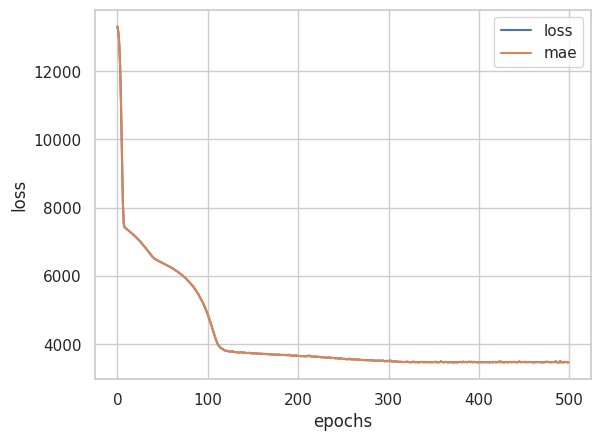

In [228]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')